# Affine transforms using scikit-image
This notebook demonstrates how to apply affine transforms to 3D images.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread

In [2]:
# Laod example data
np_array = imread('../../data/Haase_MRT_tfl3d1.tif')
np_array.shape

(192, 256, 256)

To setup an affine transform, you can do this using a 4x4 transform matrix:

In [3]:
transform_matrix = np.asarray([
    [1, 0, 0, 50],
    [0, 2, 0, 0],
    [0, 0, 0.5, 0],
    [0, 0, 0, 1]
])

Scikit-image only supports 2D transforms and thus, we pick a slice to transform it:

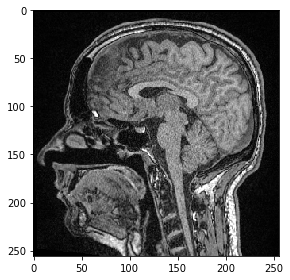

In [4]:
# pull image stack from GPU and pick a slice
image = np_array[100]

from skimage.io import imshow
imshow(image)

We now define an affine transform using scikit-image and apply it to the image.

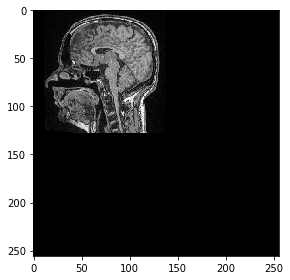

In [5]:
from skimage import transform as tf

# define transform with #scikit image
transform = tf.AffineTransform(scale=0.5, translation=[10,0])

transformed_image = tf.warp(image, transform.inverse)
imshow(transformed_image)

## Interoperability with clesperanto
Next, we push this single plane image to the GPU and transform it using pyclesperanto

In [6]:
import pyclesperanto_prototype as cle

cle.select_device('RTX')

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_imshow.py:14: UserWarning: The imshow parameter color_map is deprecated. Use colormap instead.
  warnings.warn("The imshow parameter color_map is deprecated. Use colormap instead.")


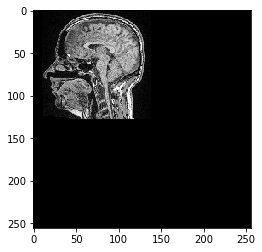

In [7]:
image_gpu = cle.push(image)

# define transform with #scikit image
from skimage import transform as tf
transform = tf.AffineTransform(scale=0.5, translation=[10,0])

transformed_image = cle.affine_transform(image_gpu, transform=transform)
cle.imshow(transformed_image, color_map="Greys_r")